In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:\\Users\\kirti\\Downloads')

In [3]:
df=pd.read_excel('Company_Data2015-1.xlsx')

In [4]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_to_').str.replace('%', 'perc').str.replace('(', '').str.replace(')', '').str.replace('-','_').str.replace('[', '_').str.replace(']', (''))

In [6]:
df.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [7]:
df.shape

(3586, 67)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital_                 3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions_  3586 non-null   float64
 11  Total_Assets_to_Liabilities_  

In [9]:
df.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [10]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [11]:
df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


#### Checking proportion of Default

In [12]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [13]:
df['default'].value_counts(normalize = True)

0    0.891801
1    0.108199
Name: default, dtype: float64

In [14]:
df.duplicated().sum()

0

In [15]:
df.isnull().sum()

Co_Code                              0
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
                                  ... 
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
default                              0
Length: 68, dtype: int64

In [16]:
df.isnull().sum().sort_values(ascending = False).head(20)  


Inventory_Velocity_Days              103
Book_Value_Adj._Unit_Curr              4
Debtors_Ratio_Latest                   1
PBIDTM_perc_Latest                     1
Current_Ratio_Latest                   1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Total_Asset_Turnover_Ratio_Latest      1
Interest_Cover_Ratio_Latest            1
PBITM_perc_Latest                      1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
PBIT                                   0
Selling_Cost                           0
Cost_of_Production                     0
Value_Of_Output                        0
PBIDT                                  0
PBDT                                   0
default                                0
dtype: int64

In [17]:
df.size

243848

In [18]:
Company_X = df.drop('default', axis = 1)
Company_Y = df['default']

#### UNIVARIATE ANALYSIS

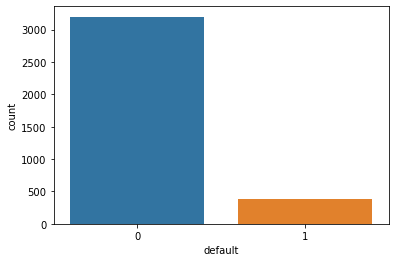

In [19]:
sns.countplot(df['default'])

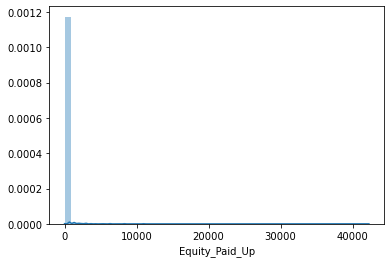

In [20]:
sns.distplot(Company_X.Equity_Paid_Up)

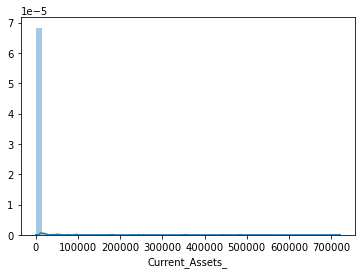

In [21]:
sns.distplot(Company_X.Current_Assets_)

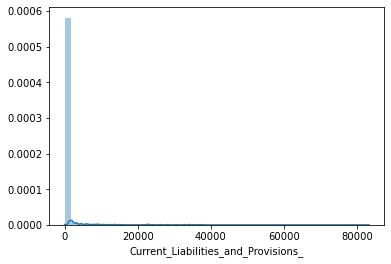

In [22]:
sns.distplot(Company_X.Current_Liabilities_and_Provisions_)

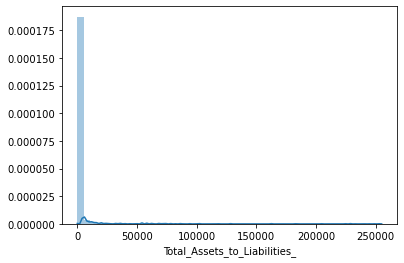

In [23]:
sns.distplot(Company_X.Total_Assets_to_Liabilities_)

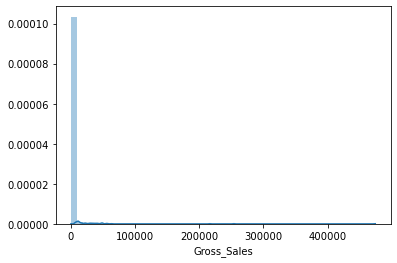

In [24]:
sns.distplot(Company_X.Gross_Sales)

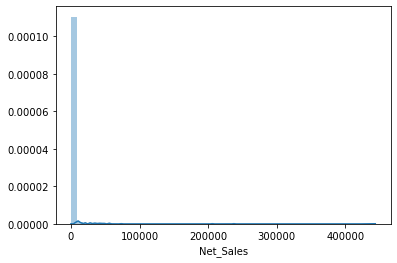

In [25]:
sns.distplot(Company_X.Net_Sales)

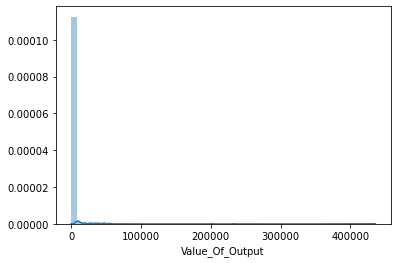

In [26]:
sns.distplot(Company_X.Value_Of_Output)

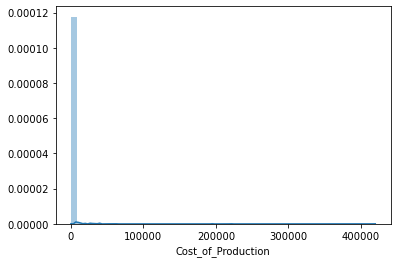

In [27]:
sns.distplot(Company_X.Cost_of_Production)

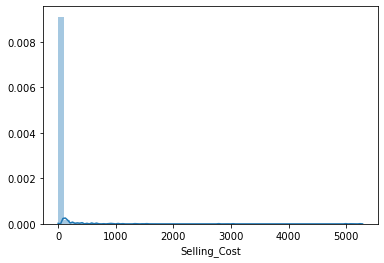

In [28]:
sns.distplot(Company_X.Selling_Cost)

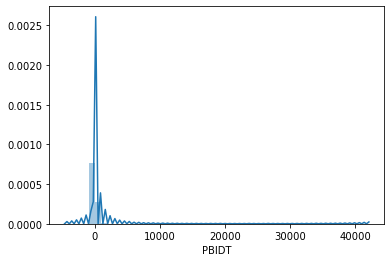

In [29]:
sns.distplot(Company_X.PBIDT)

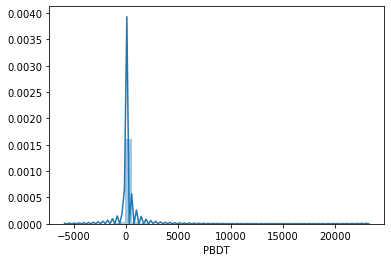

In [30]:
sns.distplot(Company_X.PBDT)

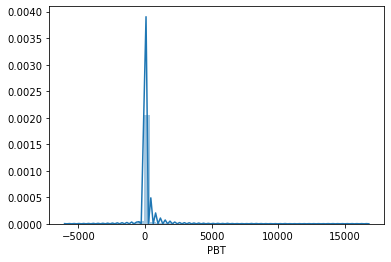

In [31]:
sns.distplot(Company_X.PBT)

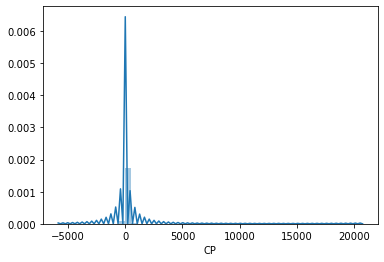

In [32]:
sns.distplot(Company_X.CP)

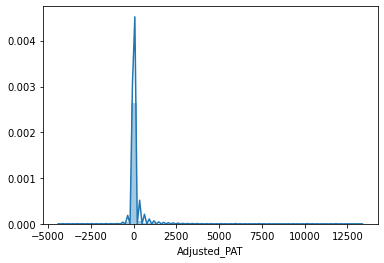

In [33]:
sns.distplot(Company_X.Adjusted_PAT)

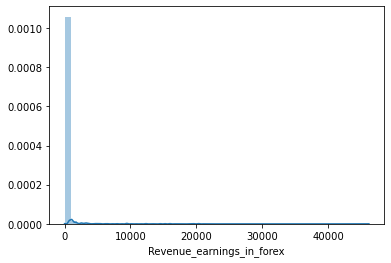

In [34]:
sns.distplot(Company_X.Revenue_earnings_in_forex)

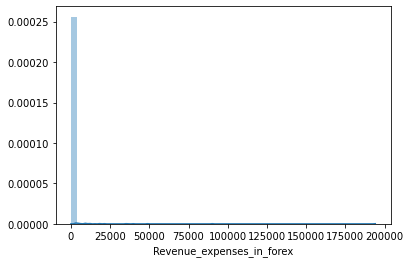

In [35]:
sns.distplot(Company_X.Revenue_expenses_in_forex)

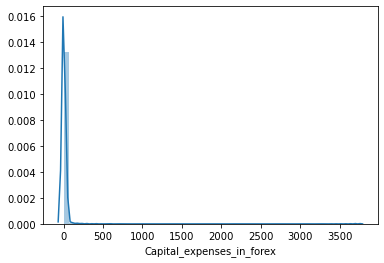

In [36]:
sns.distplot(Company_X.Capital_expenses_in_forex)

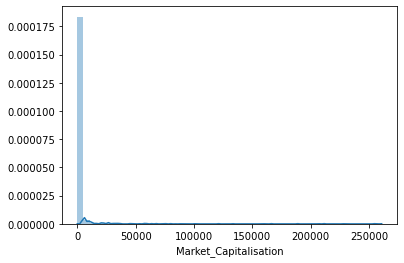

In [37]:
sns.distplot(Company_X.Market_Capitalisation)

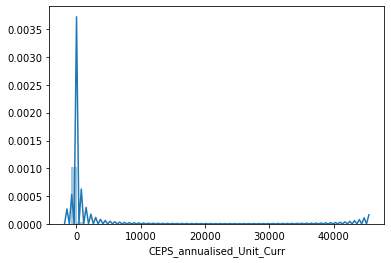

In [38]:
sns.distplot(Company_X.CEPS_annualised_Unit_Curr)

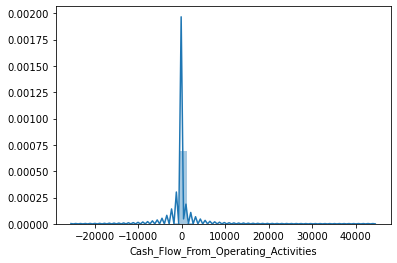

In [39]:
sns.distplot(Company_X.Cash_Flow_From_Operating_Activities)

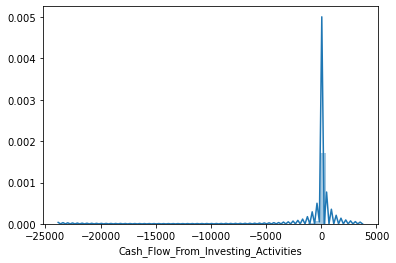

In [40]:
sns.distplot(Company_X.Cash_Flow_From_Investing_Activities  )

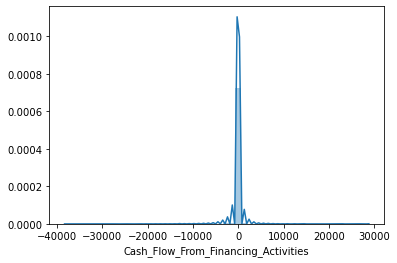

In [41]:
sns.distplot(Company_X.Cash_Flow_From_Financing_Activities)

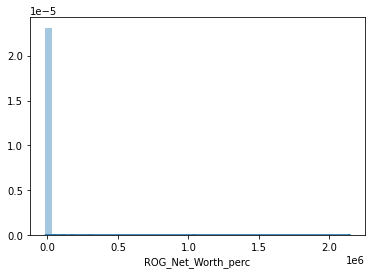

In [42]:
sns.distplot(Company_X.ROG_Net_Worth_perc)

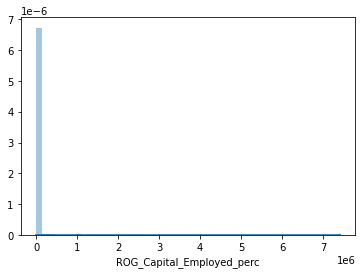

In [43]:
sns.distplot(Company_X.ROG_Capital_Employed_perc)

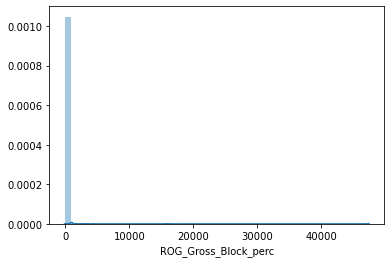

In [44]:
sns.distplot(Company_X.ROG_Gross_Block_perc)

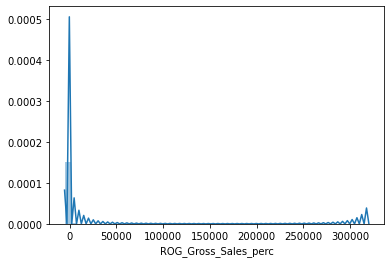

In [45]:
sns.distplot(Company_X.ROG_Gross_Sales_perc)

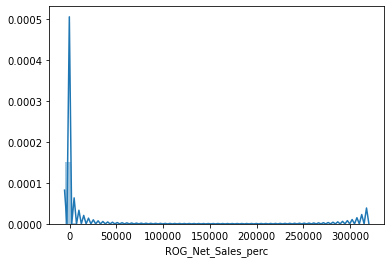

In [46]:
sns.distplot(Company_X.ROG_Net_Sales_perc)

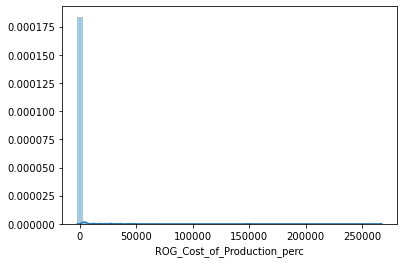

In [47]:
sns.distplot(Company_X.ROG_Cost_of_Production_perc)

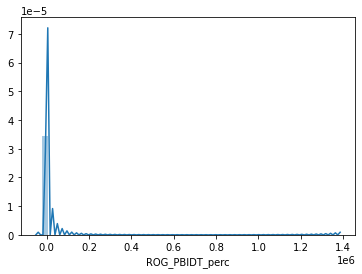

In [48]:
sns.distplot(Company_X.ROG_PBIDT_perc)

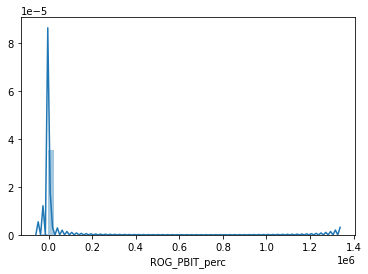

In [49]:
sns.distplot(Company_X.ROG_PBIT_perc)

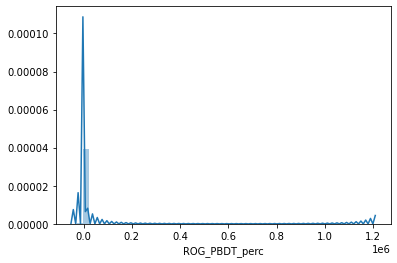

In [50]:
sns.distplot(Company_X.ROG_PBDT_perc)

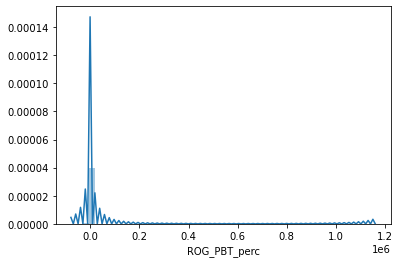

In [51]:
sns.distplot(Company_X.ROG_PBT_perc)

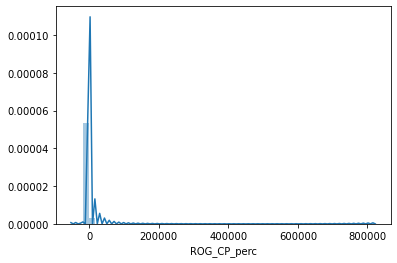

In [52]:
sns.distplot(Company_X.ROG_CP_perc)

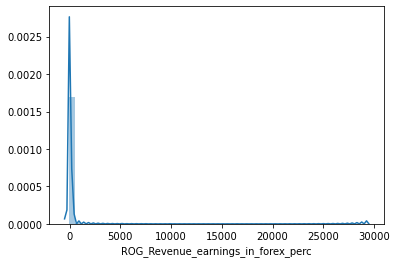

In [53]:
sns.distplot(Company_X.ROG_Revenue_earnings_in_forex_perc)

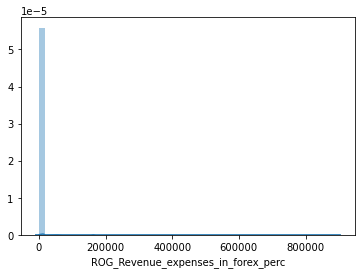

In [54]:
sns.distplot(Company_X.ROG_Revenue_expenses_in_forex_perc)

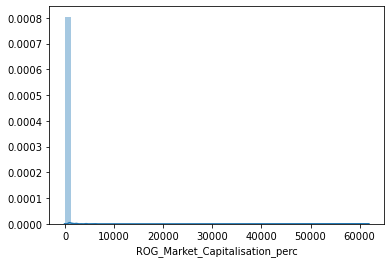

In [55]:
sns.distplot(Company_X.ROG_Market_Capitalisation_perc)

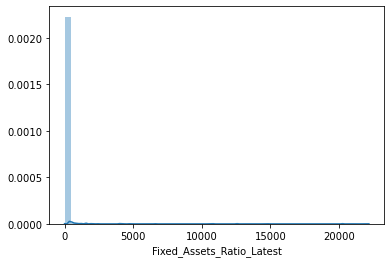

In [56]:
sns.distplot(Company_X.Fixed_Assets_Ratio_Latest)

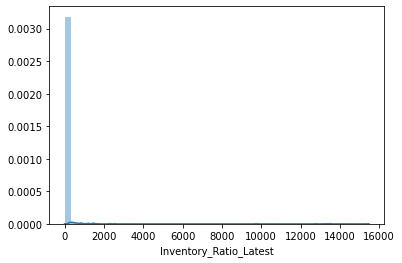

In [57]:
sns.distplot(Company_X.Inventory_Ratio_Latest)

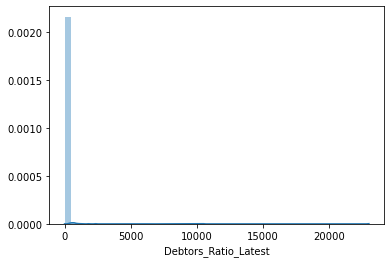

In [58]:
sns.distplot(Company_X.Debtors_Ratio_Latest)

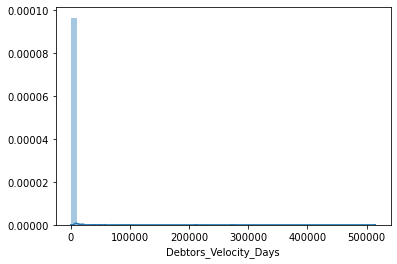

In [59]:
sns.distplot(Company_X.Debtors_Velocity_Days)

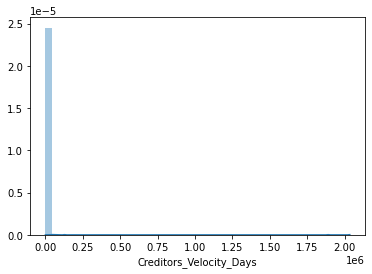

In [60]:
sns.distplot(Company_X.Creditors_Velocity_Days)

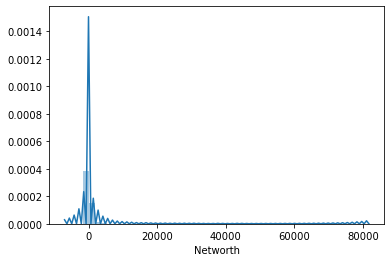

In [61]:
sns.distplot(df.Networth)

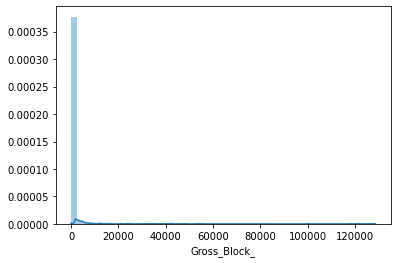

In [62]:
sns.distplot(df.Gross_Block_)

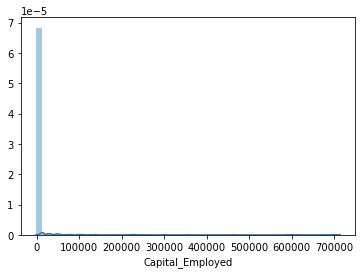

In [63]:
sns.distplot(df.Capital_Employed)

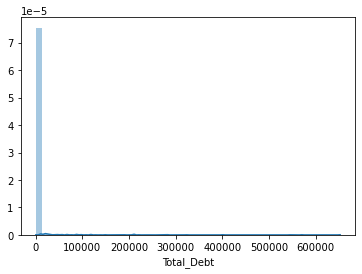

In [64]:
sns.distplot(df.Total_Debt)

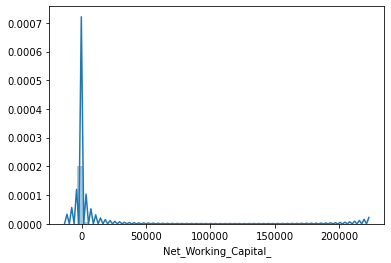

In [65]:
sns.distplot(df.Net_Working_Capital_)

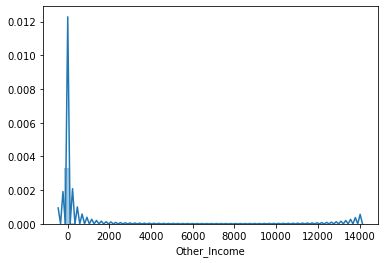

In [66]:
sns.distplot(df.Other_Income)

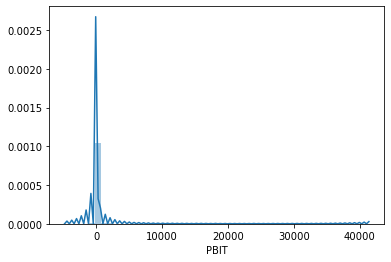

In [67]:
sns.distplot(df.PBIT)

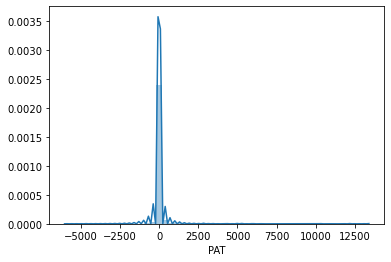

In [68]:
sns.distplot(df.PAT)

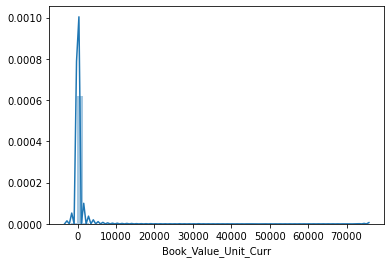

In [69]:
sns.distplot(Company_X.Book_Value_Unit_Curr)

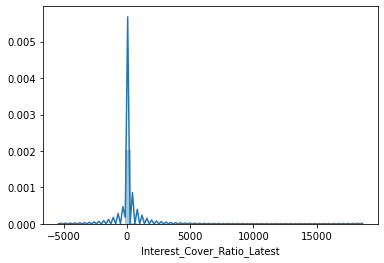

In [70]:
sns.distplot(Company_X.Interest_Cover_Ratio_Latest)

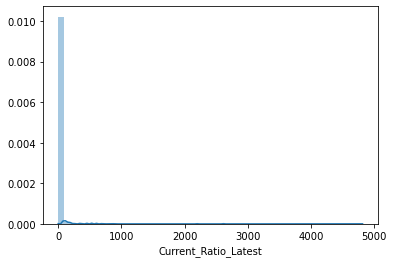

In [71]:
sns.distplot(Company_X.Current_Ratio_Latest)

#### BIVARIATE ANALYSIS

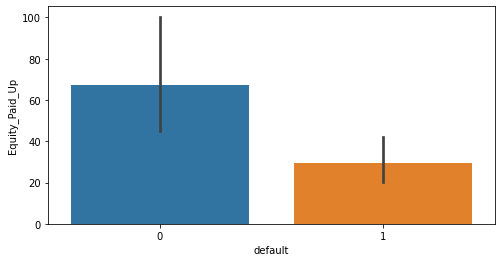

In [72]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="default", y="Equity_Paid_Up", data=df)

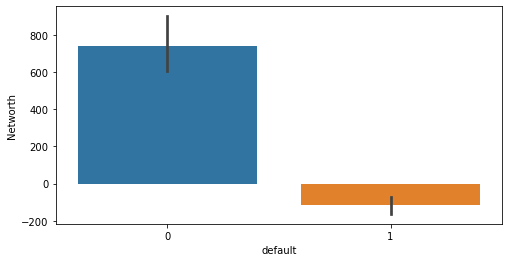

In [73]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="default", y="Networth", data=df)

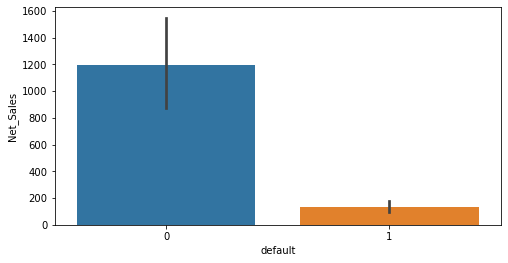

In [74]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="default", y="Net_Sales", data=df)

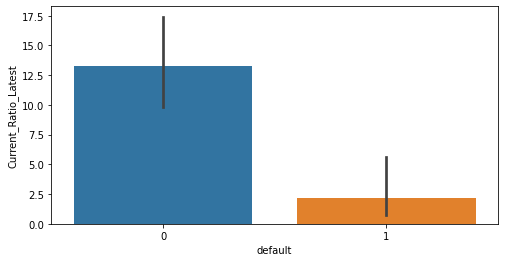

In [75]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="default", y="Current_Ratio_Latest", data=df)

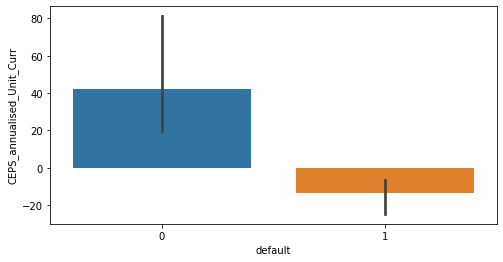

In [76]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="default", y="CEPS_annualised_Unit_Curr", data=df)

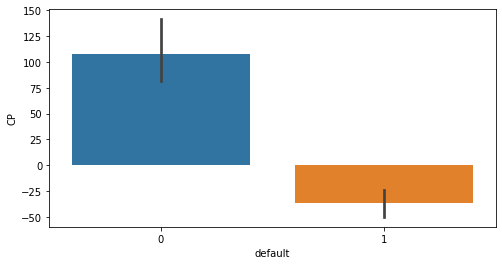

In [77]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="default", y="CP", data=df)

In [78]:
df.skew().head(20).sort_values(ascending = False)

Equity_Paid_Up                         45.928921
Cost_of_Production                     34.588562
Gross_Sales                            31.560200
Net_Sales                              31.085039
Value_Of_Output                        30.812223
Net_Working_Capital_                   30.580553
Current_Assets_                        20.779473
Total_Debt                             19.417622
Selling_Cost                           18.879055
Other_Income                           18.805640
Gross_Block_                           18.528589
Capital_Employed                       18.073683
Current_Liabilities_and_Provisions_    15.291405
PBIT                                   14.009481
PBDT                                   13.555030
Total_Assets_to_Liabilities_           13.367863
PBIDT                                  13.179047
Networth_Next_Year                     13.041264
Networth                               11.738799
Co_Code                                 1.604115
dtype: float64

In [79]:
df.skew().tail(10).sort_values(ascending=True)

APATM_perc_Latest                 -49.277483
PBDTM_perc_Latest                 -47.750324
CPM_perc_Latest                   -47.011631
PBITM_perc_Latest                 -35.997867
default                             2.523672
Inventory_Velocity_Days             3.494365
Value_of_Output_to_Total_Assets     4.704950
Value_of_Output_to_Gross_Block     31.998522
Creditors_Velocity_Days            34.120441
Debtors_Velocity_Days              38.660834
dtype: float64

In [80]:
df.corr()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,Current_Liabilities_and_Provisions_,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
Co_Code,1.000000,-0.052519,-0.005923,-0.056693,-0.042042,-0.036870,-0.043245,-0.019953,-0.038191,-0.056355,...,-0.005819,-0.007910,-0.007804,-0.008512,-0.002988,-0.018956,-0.054871,0.121782,0.037216,-0.134662
Networth_Next_Year,-0.052519,1.000000,0.364376,0.971500,0.594155,0.480513,0.742405,0.240580,0.481718,0.777579,...,0.006555,0.002114,0.001920,0.002434,-0.006725,-0.005408,-0.025964,-0.021756,-0.006601,-0.065604
Equity_Paid_Up,-0.005923,0.364376,1.000000,0.389490,0.135475,0.078237,0.272824,0.047751,0.064078,0.173244,...,0.002631,0.000316,0.000278,0.000193,0.000297,-0.002068,-0.017682,-0.026866,-0.002236,-0.014994
Networth,-0.056693,0.971500,0.389490,1.000000,0.632716,0.517850,0.737402,0.258749,0.520116,0.803644,...,0.005258,0.000450,0.000199,0.000903,-0.006442,-0.005557,-0.020501,-0.026738,-0.006944,-0.064959
Capital_Employed,-0.042042,0.594155,0.135475,0.632716,1.000000,0.987106,0.262347,0.244916,0.975909,0.624448,...,0.003235,0.001466,0.001421,0.001634,-0.005134,-0.003800,-0.035648,-0.014550,-0.004363,-0.033764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Creditors_Velocity_Days,-0.018956,-0.005408,-0.002068,-0.005557,-0.003800,-0.003133,-0.004431,-0.002274,-0.002898,-0.002662,...,0.000108,-0.001543,-0.001622,-0.001287,0.252075,1.000000,-0.019365,-0.023737,-0.002117,0.024457
Inventory_Velocity_Days,-0.054871,-0.025964,-0.017682,-0.020501,-0.035648,-0.034679,0.001632,-0.011007,-0.030709,-0.001681,...,-0.001073,0.003507,0.003490,0.003499,0.002178,-0.019365,1.000000,-0.066531,-0.001617,0.024266
Value_of_Output_to_Total_Assets,0.121782,-0.021756,-0.026866,-0.026738,-0.014550,-0.010805,-0.009510,-0.026255,-0.009021,-0.001577,...,0.026239,0.019872,0.019936,0.020068,-0.033200,-0.023737,-0.066531,1.000000,0.143480,-0.101665
Value_of_Output_to_Gross_Block,0.037216,-0.006601,-0.002236,-0.006944,-0.004363,-0.003593,-0.007491,0.000919,-0.003305,-0.006481,...,0.002590,0.001816,0.001819,0.001846,-0.003306,-0.002117,-0.001617,0.143480,1.000000,-0.020440


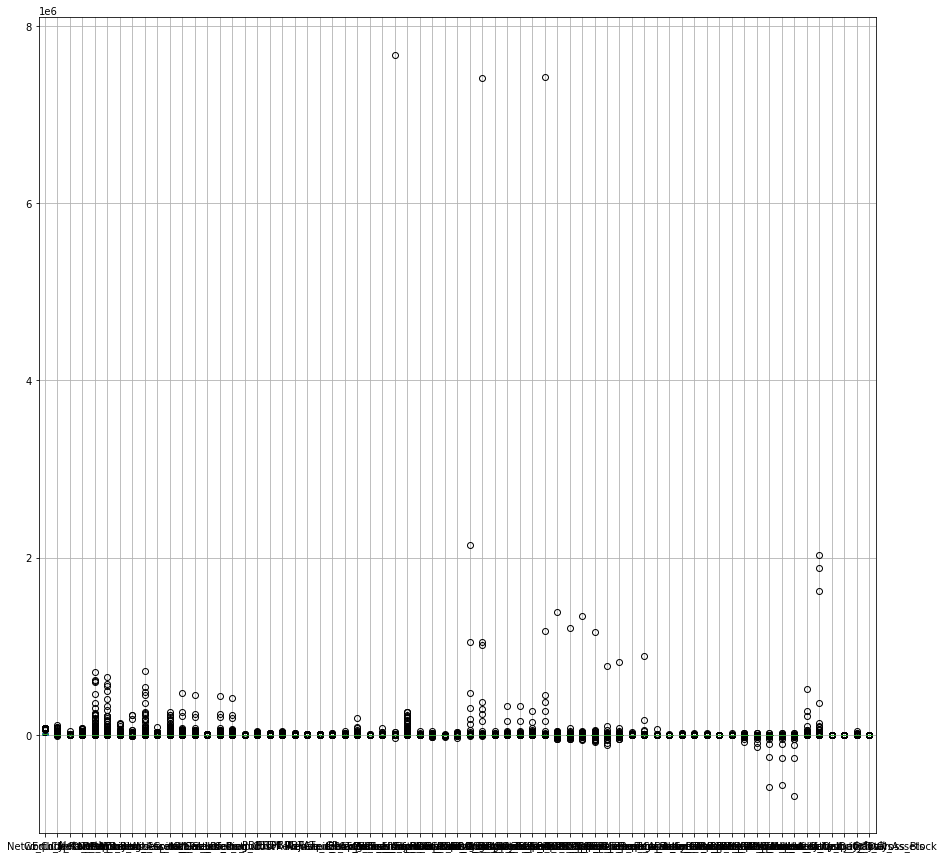

In [81]:
plt.figure(figsize = (15,15))
df.boxplot();
plt.show();

In [82]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [83]:
((Company_X > UL) | (Company_X < LL)).sum()

APATM_perc_Latest                  933
Adjusted_PAT                       954
Book_Value_Adj._Unit_Curr          486
Book_Value_Unit_Curr               485
CEPS_annualised_Unit_Curr          602
                                  ... 
Total_Assets_to_Liabilities_       574
Total_Debt                         583
Value_Of_Output                    559
Value_of_Output_to_Gross_Block     481
Value_of_Output_to_Total_Assets    150
Length: 67, dtype: int64

In [84]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [85]:
Company_X.isnull().sum()

Co_Code                            291
Co_Name                              0
Networth_Next_Year                 676
Equity_Paid_Up                     448
Networth                           650
                                  ... 
Debtors_Velocity_Days              398
Creditors_Velocity_Days            391
Inventory_Velocity_Days            365
Value_of_Output_to_Total_Assets    150
Value_of_Output_to_Gross_Block     481
Length: 67, dtype: int64

In [86]:
Company_X.isnull().sum().sum()

42440

In [87]:
Company_X = Company_X.drop(['Networth_Next_Year'], axis = 1)

In [88]:
Company_X.shape

(3586, 66)

In [89]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

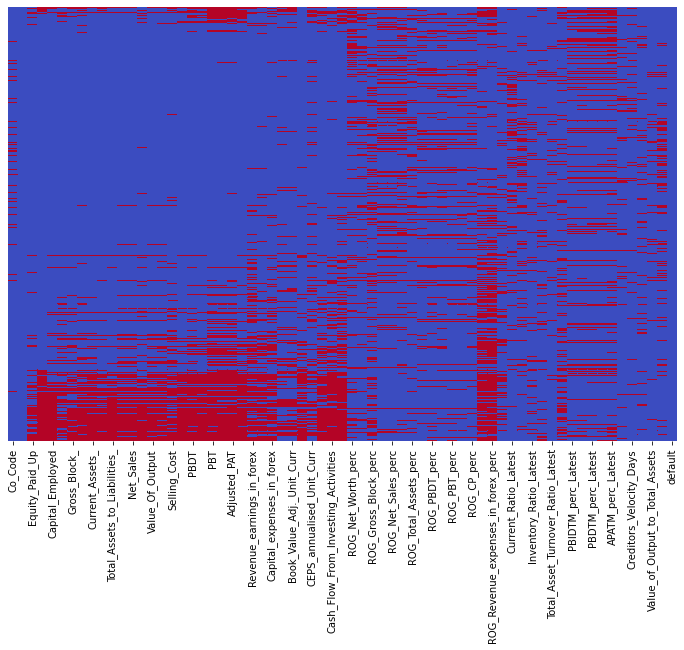

In [90]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [91]:
Company_sub1.isnull().sum(axis = 1)

0       19
1       34
2       43
3       36
4       35
        ..
3581    30
3582    36
3583    34
3584    30
3585    36
Length: 3586, dtype: int64

In [92]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [93]:
Company_sub1_temp.shape

(1179, 67)

In [94]:
Company_sub1_temp['default'].value_counts()

0    1061
1     118
Name: default, dtype: int64

In [95]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [96]:
118/388

0.30412371134020616

In [97]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

ROG_Revenue_expenses_in_forex_perc     0.450363
ROG_Revenue_earnings_in_forex_perc     0.367262
Cash_Flow_From_Financing_Activities    0.280257
PAT                                    0.267429
Adjusted_PAT                           0.266035
                                         ...   
Co_Code                                0.081149
Total_Asset_Turnover_Ratio_Latest      0.056330
Value_of_Output_to_Total_Assets        0.041829
Co_Name                                0.000000
default                                0.000000
Length: 67, dtype: float64

In [98]:
predictors = Company_sub1.drop('default', axis = 1)
response = Company_sub1['default']

In [99]:
predictors = predictors.drop(['Co_Name'], axis = 1)

In [100]:
predictors = predictors.drop(['Co_Code'], axis = 1)

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [102]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

In [103]:
from sklearn.impute import KNNImputer

In [104]:
imputer = KNNImputer(n_neighbors=10)

In [105]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [106]:
Company_imputed.isnull().sum()

Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
Gross_Block_                       0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_to_Total_Assets    0
Value_of_Output_to_Gross_Block     0
default                            0
Length: 65, dtype: int64

In [107]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

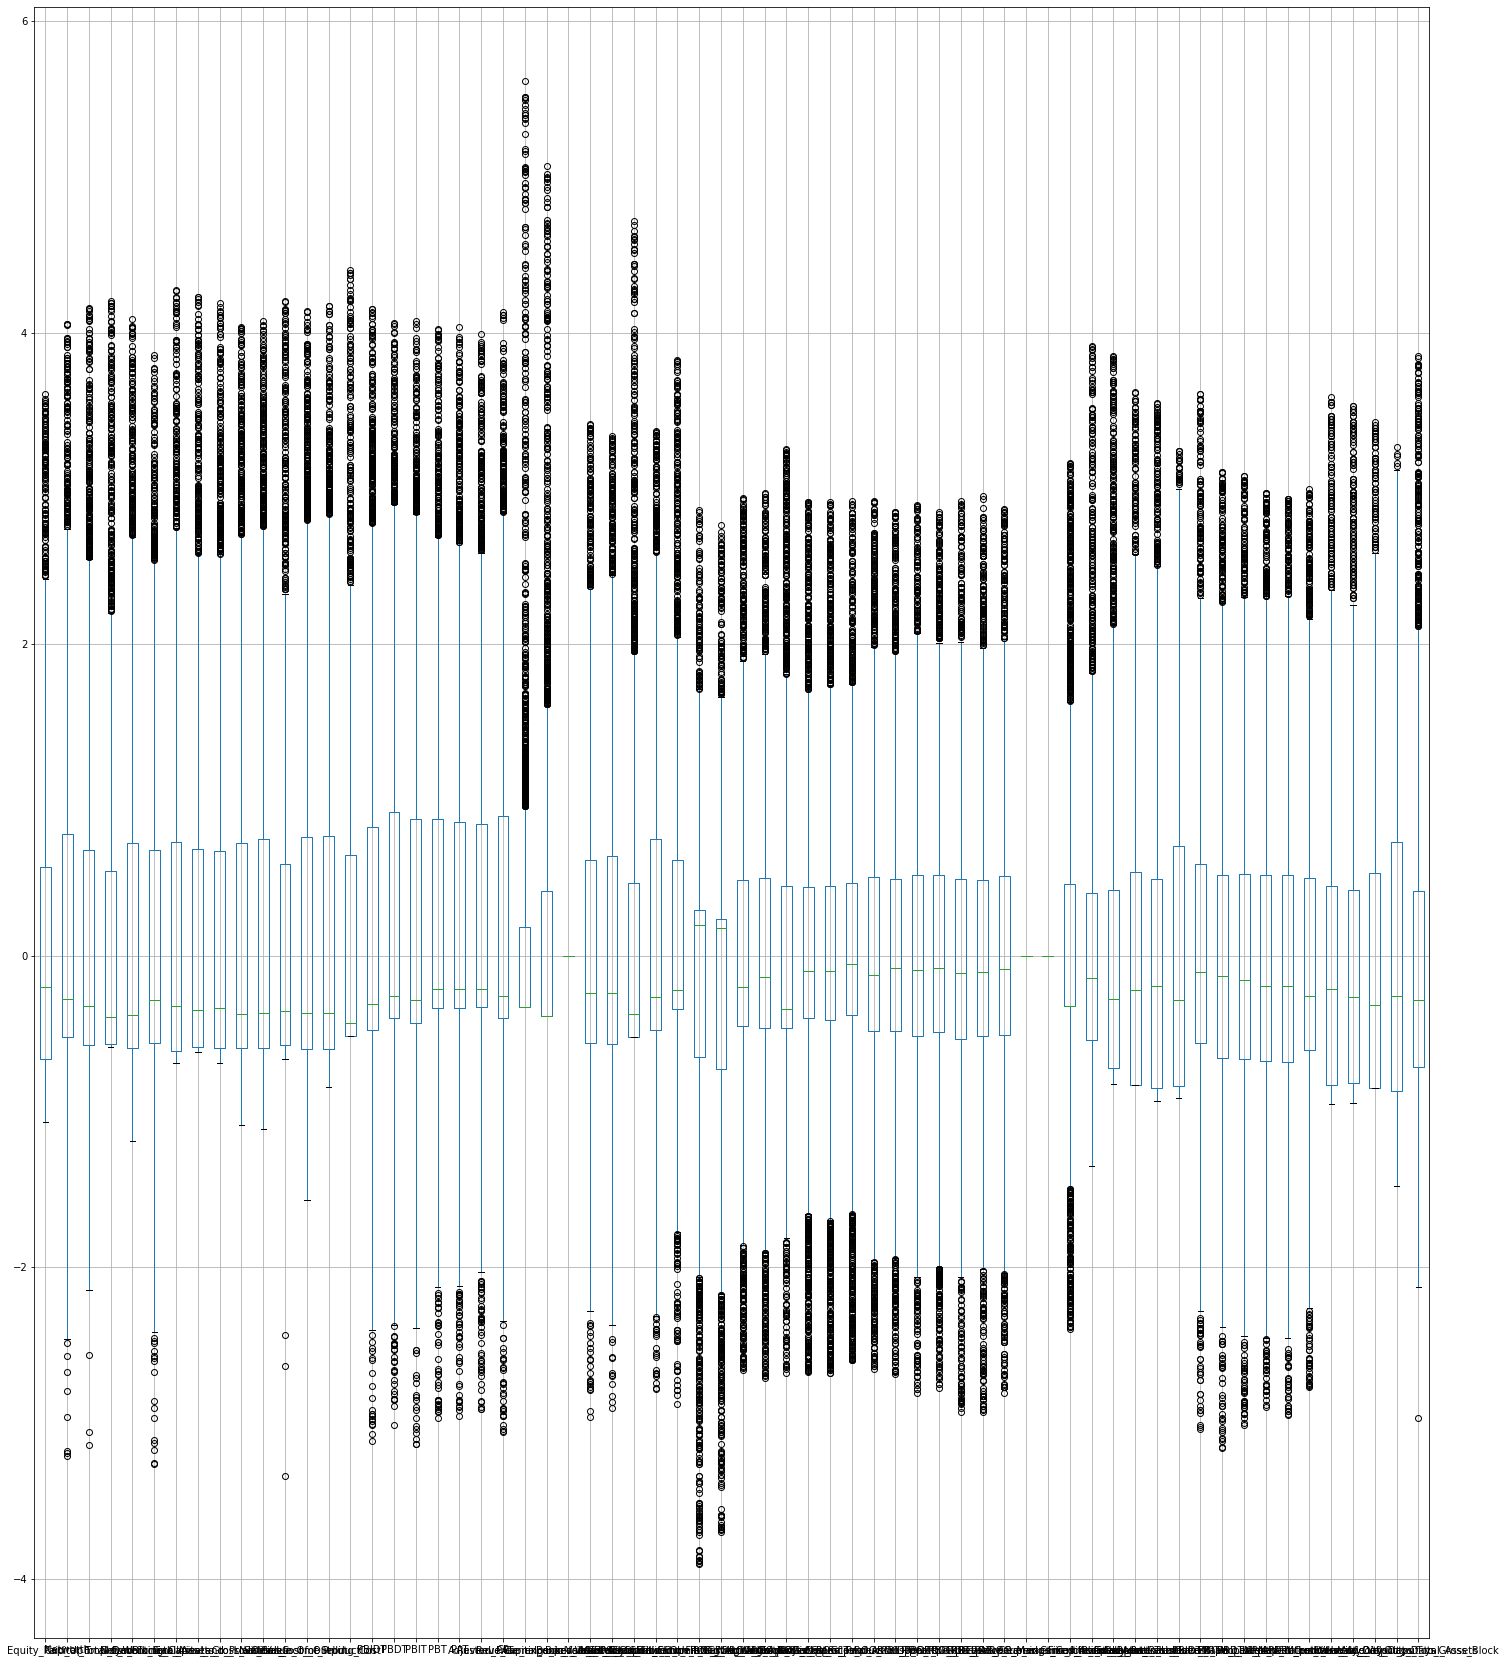

In [108]:
plt.figure(figsize = (25,30))
predictors.boxplot();
plt.show();

In [109]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [110]:
for column in predictors.columns:
    if predictors[column].dtype != 'object': 
        lr,ur=remove_outlier(predictors[column])         
        predictors[column]=np.where(predictors[column]>ur,ur,predictors[column])
        predictors[column]=np.where(predictors[column]<lr,lr,predictors[column])

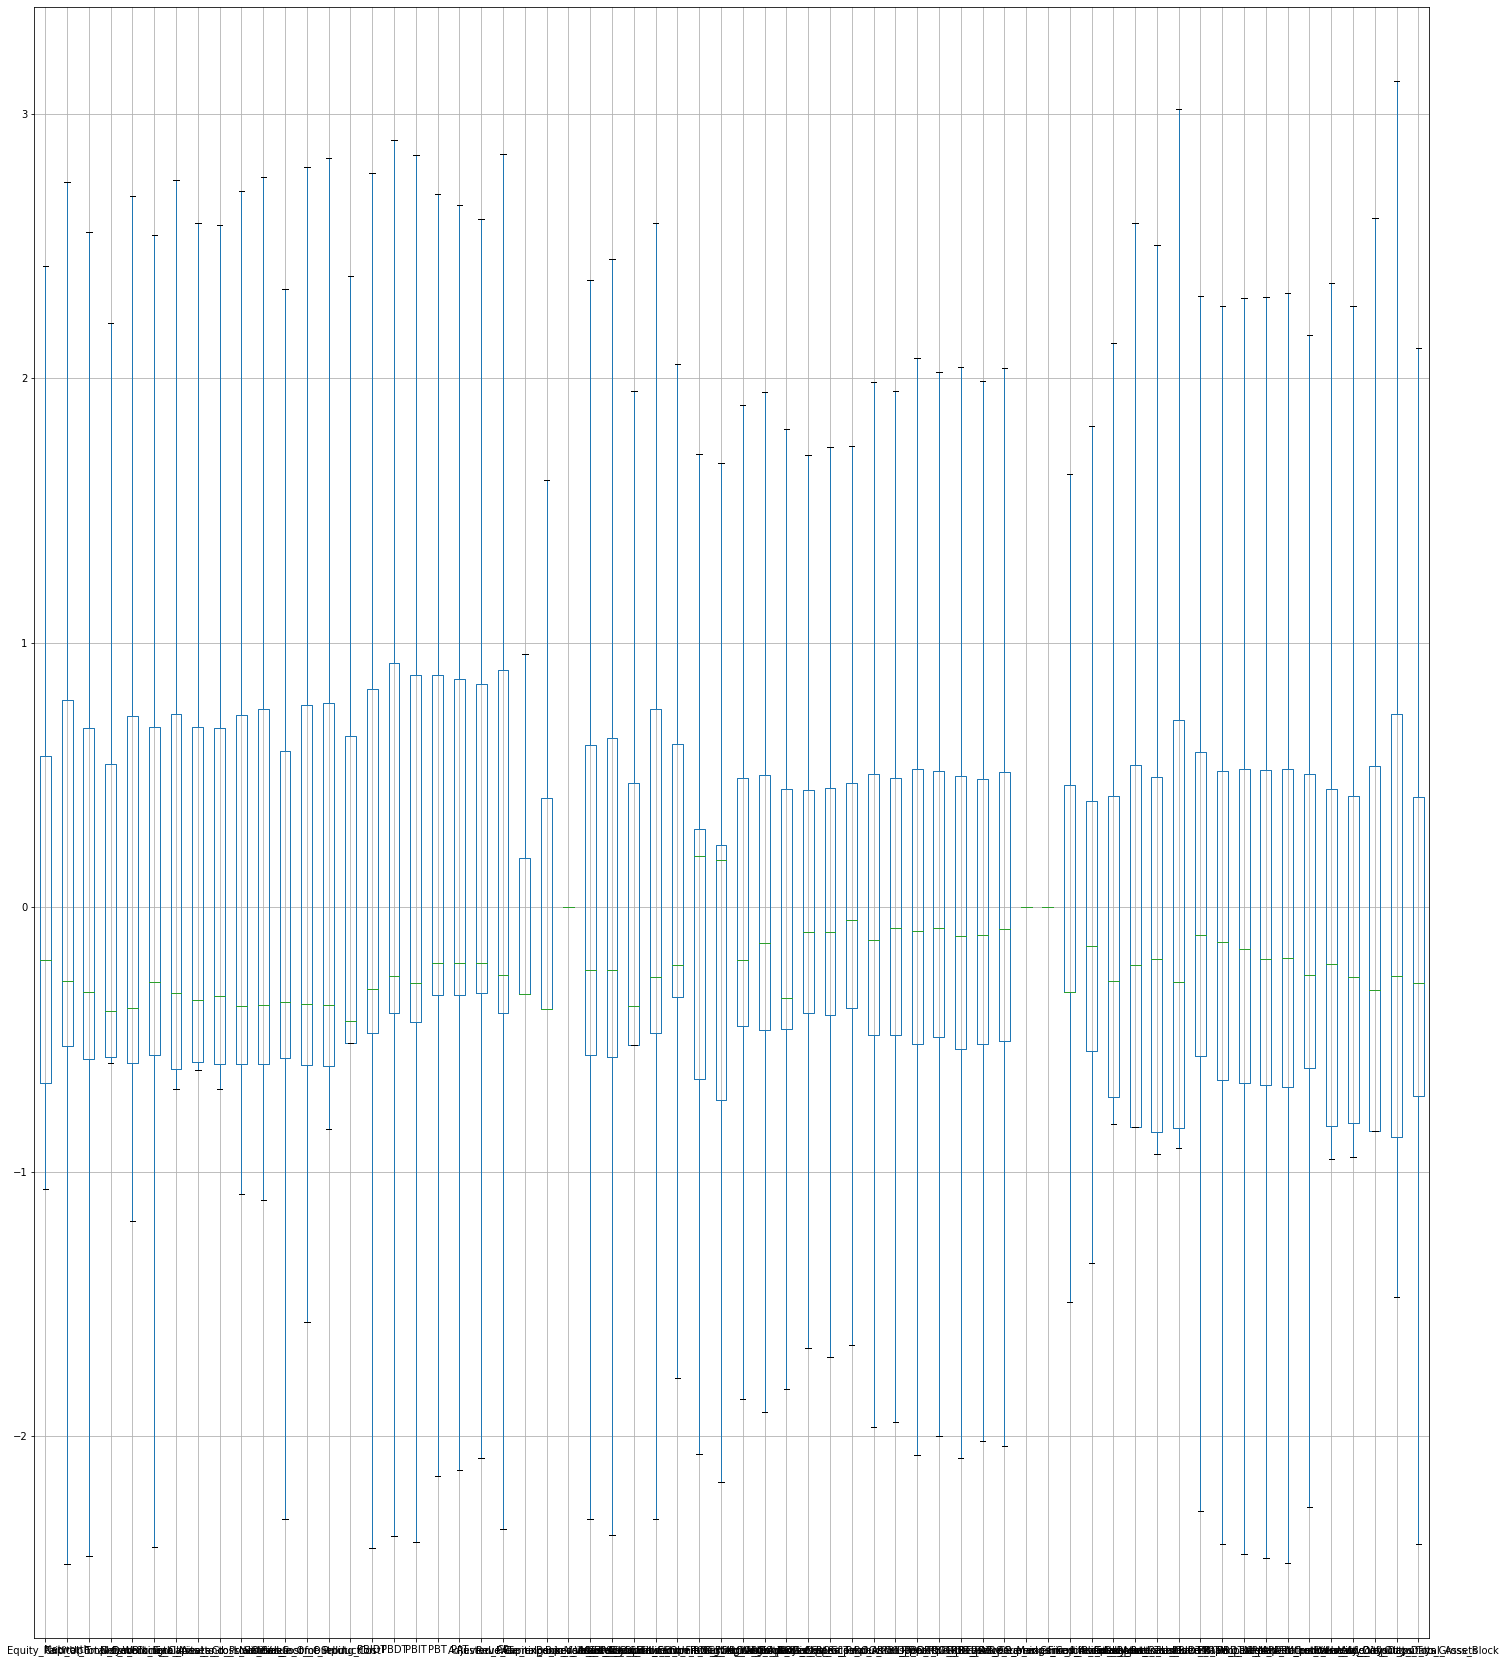

In [111]:
plt.figure(figsize = (25,30))
predictors.boxplot();
plt.show();

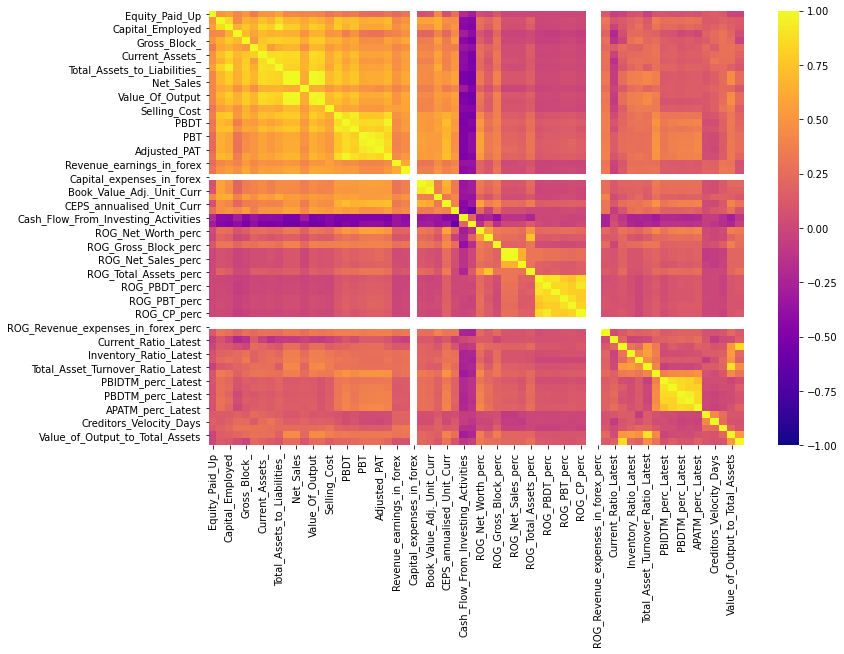

In [112]:
plt.figure(figsize = (12,8))
cor_matrix = predictors.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [114]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42, stratify = response)

In [115]:
X_train.shape

(2402, 64)

In [116]:
X_test.shape

(1184, 64)

In [117]:
y_train.shape

(2402,)

In [118]:
y_test.shape

(1184,)

In [119]:
LogR = LogisticRegression()

In [120]:
selector = RFE(estimator = LogR, n_features_to_select=30, step=1)

In [121]:
selector = selector.fit(X_train, y_train)

In [122]:
selector.n_features_

30

In [123]:
selector.ranking_

array([24,  1,  1, 12,  1,  9,  1,  1,  1,  1,  1, 28,  1,  1,  8,  3,  1,
        2,  1,  1,  1,  1, 32,  1, 33,  1,  1, 18, 20, 25, 31, 27,  1,  1,
        7, 15, 16,  1, 19,  1,  5,  1,  4, 22,  6, 34, 35, 13,  1,  1,  1,
       30, 26,  1,  1, 23, 10, 11,  1, 17, 21, 14,  1, 29])

In [124]:
ds = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
ds[ds['Rank'] == 1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
4,Gross_Block_,1
6,Current_Assets_,1
7,Current_Liabilities_and_Provisions_,1
8,Total_Assets_to_Liabilities_,1
9,Gross_Sales,1
10,Net_Sales,1
12,Value_Of_Output,1
13,Cost_of_Production,1


In [125]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [126]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [127]:
print(confusion_matrix(y_train, pred_train))

[[2118   24]
 [  81  179]]


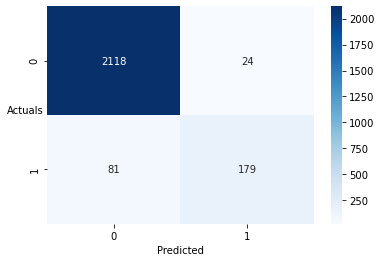

In [128]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [129]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2142
         1.0       0.88      0.69      0.77       260

    accuracy                           0.96      2402
   macro avg       0.92      0.84      0.87      2402
weighted avg       0.95      0.96      0.95      2402



In [130]:
ytrain_proba = selector.predict_proba(X_train)
ytest_proba = selector.predict_proba(X_test)

AUC for the Training Data: 0.970


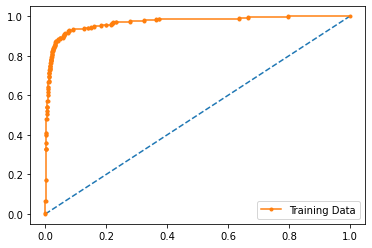

In [131]:
# AUC and ROC for the training data

# calculate AUC
LR_train_auc = metrics.roc_auc_score(y_train,ytrain_proba[:,1])
print('AUC for the Training Data: %.3f' % LR_train_auc)

#  calculate roc curve
LR_fpr_train, LR_tpr_train, thresholds = metrics.roc_curve(y_train,ytrain_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_fpr_train, LR_tpr_train, marker='.',label = 'Training Data')

plt.legend(loc='best')
plt.show()

In [132]:
LR_metrics=classification_report(y_train,pred_train,output_dict=True)
dfm=pd.DataFrame(LR_metrics).transpose()
LR_train_f1=round(dfm.loc["1.0"][2],2)
LR_train_recall=round(dfm.loc["1.0"][1],2)
LR_train_precision=round(dfm.loc["1.0"][0],2)
print ('LR_train_precision ',LR_train_precision)
print ('LR_train_recall ',LR_train_recall)
print ('LR_train_f1 ',LR_train_f1)

LR_train_precision  0.88
LR_train_recall  0.69
LR_train_f1  0.77


In [133]:
print(confusion_matrix(y_test, pred_test))

[[1040   16]
 [  49   79]]


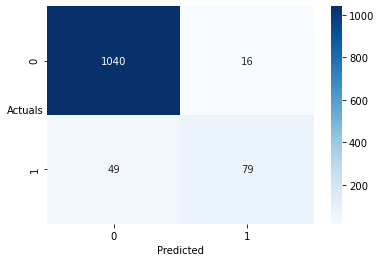

In [134]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [135]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1056
         1.0       0.83      0.62      0.71       128

    accuracy                           0.95      1184
   macro avg       0.89      0.80      0.84      1184
weighted avg       0.94      0.95      0.94      1184



AUC for the Test Data: 0.949


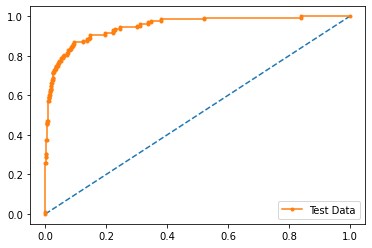

In [136]:
# AUC and ROC for the test data

# calculate AUC
LR_test_auc = metrics.roc_auc_score(y_test,ytest_proba[:,1])
print('AUC for the Test Data: %.3f' % LR_test_auc)

#  calculate roc curve
LR_fpr_test, LR_tpr_test, thresholds = metrics.roc_curve(y_test,ytest_proba[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_fpr_test, LR_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [137]:
LR_metrics=classification_report(y_test,pred_test,output_dict=True)
dfm=pd.DataFrame(LR_metrics).transpose()
LR_test_precision=round(dfm.loc["1.0"][0],2)
LR_test_recall=round(dfm.loc["1.0"][1],2)
LR_test_f1=round(dfm.loc["1.0"][2],2)
print ('LR_test_precision ',LR_test_precision)
print ('LR_test_recall ',LR_test_recall)
print ('LR_test_f1 ',LR_test_f1)

LR_test_precision  0.83
LR_test_recall  0.62
LR_test_f1  0.71


### With SMOTE

In [138]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [139]:
selector_smote = selector.fit(X_res, y_res)

In [140]:
selector_smote.n_features_

30

In [141]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [142]:
ytrain_proba_smote = selector.predict_proba(X_train)
ytest_proba_smote = selector.predict_proba(X_test)

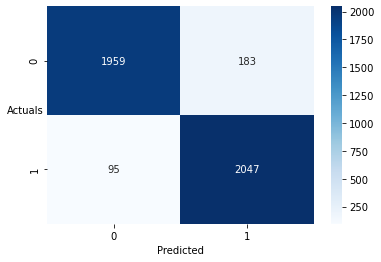

In [143]:
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_smote)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [144]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2142
         1.0       0.92      0.96      0.94      2142

    accuracy                           0.94      4284
   macro avg       0.94      0.94      0.94      4284
weighted avg       0.94      0.94      0.94      4284



In [176]:
LRS_metrics=classification_report(y_res,pred_train_smote,output_dict=True)
dfm=pd.DataFrame(LRS_metrics).transpose()
LRS_train_f1=round(dfm.loc["1.0"][2],2)
LRS_train_recall=round(dfm.loc["1.0"][1],2)
LRS_train_precision=round(dfm.loc["1.0"][0],2)
print ('LRS_train_precision ',LRS_train_precision)
print ('LRS_train_recall ',LRS_train_recall)
print ('LRS_train_f1 ',LRS_train_f1)

LRS_train_precision  0.92
LRS_train_recall  0.96
LRS_train_f1  0.94


AUC for the Training Data: 0.972


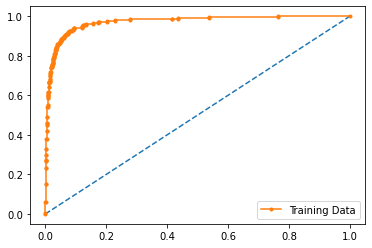

In [146]:
# AUC and ROC for the training data

# calculate AUC
LR_SMOTE_train_auc = metrics.roc_auc_score(y_train,ytrain_proba_smote[:,1])
print('AUC for the Training Data: %.3f' % LR_SMOTE_train_auc)

#  calculate roc curve
LR_SMOTE_fpr_train, LR_SMOTE_tpr_train, thresholds = metrics.roc_curve(y_train,ytrain_proba_smote[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_SMOTE_fpr_train, LR_SMOTE_tpr_train, marker='.',label = 'Training Data')

plt.legend(loc='best')
plt.show()

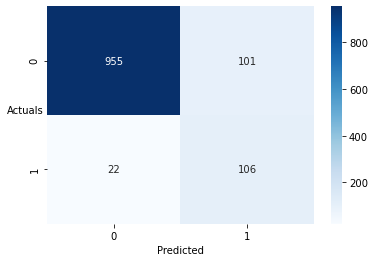

In [147]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_smote)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [148]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      1056
         1.0       0.51      0.83      0.63       128

    accuracy                           0.90      1184
   macro avg       0.74      0.87      0.79      1184
weighted avg       0.93      0.90      0.91      1184



AUC for the Test Data: 0.948


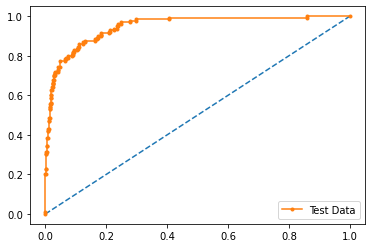

In [149]:
# AUC and ROC for the test data

# calculate AUC
LR_SMOTE_test_auc = metrics.roc_auc_score(y_test,ytest_proba_smote[:,1])
print('AUC for the Test Data: %.3f' % LR_SMOTE_test_auc)

#  calculate roc curve
LR_SMOTE_fpr_test, LR_SMOTE_tpr_test, thresholds = metrics.roc_curve(y_test,ytest_proba_smote[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LR_SMOTE_fpr_test, LR_SMOTE_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [150]:
LRS_metrics=classification_report(y_test, pred_test_smote,output_dict=True)
dfm=pd.DataFrame(LRS_metrics).transpose()
LRS_test_precision=round(dfm.loc["1.0"][0],2)
LRS_test_recall=round(dfm.loc["1.0"][1],2)
LRS_test_f1=round(dfm.loc["1.0"][2],2)
print ('LR_SMOTE_test_precision ',LRS_test_precision)
print ('LR_SMOTE_test_recall ',LRS_test_recall)
print ('LR_SMOTE_test_f1 ',LRS_test_f1)

LR_SMOTE_test_precision  0.51
LR_SMOTE_test_recall  0.83
LR_SMOTE_test_f1  0.63


#### RANDOM FOREST MODEL

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

param_grid = {
    'max_depth': [10, 20, 30],
    'max_features': [2,3,4,5,6,7,8],
    'min_samples_leaf': [25, 50, 75,100],
    'min_samples_split': [25,50, 75, 100],
    'n_estimators': [50, 100, 150]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [152]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [25, 50, 75, 100],
                         'min_samples_split': [25, 50, 75, 100],
                         'n_estimators': [50, 100, 150]})

In [153]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 7,
 'min_samples_leaf': 25,
 'min_samples_split': 75,
 'n_estimators': 100}

In [154]:
best_grid = grid_search.best_estimator_

In [155]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

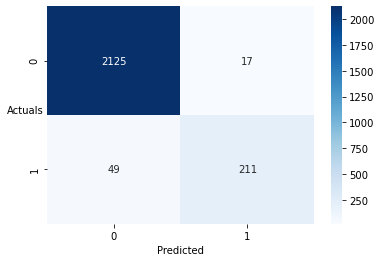

In [156]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [157]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2142
         1.0       0.93      0.81      0.86       260

    accuracy                           0.97      2402
   macro avg       0.95      0.90      0.92      2402
weighted avg       0.97      0.97      0.97      2402



AUC: 0.992


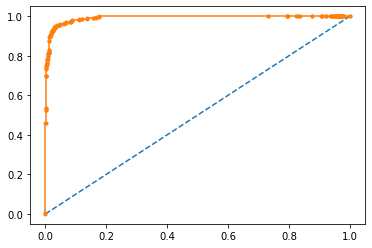

In [158]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC

RFC_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % RFC_train_auc)
# calculate roc curve

fpr_train, tpr_train, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_train, tpr_train, marker='.')
# show the plot
plt.show()

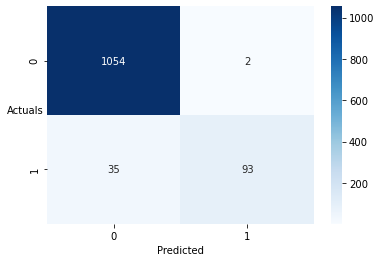

In [159]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [160]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1056
         1.0       0.98      0.73      0.83       128

    accuracy                           0.97      1184
   macro avg       0.97      0.86      0.91      1184
weighted avg       0.97      0.97      0.97      1184



AUC: 0.985


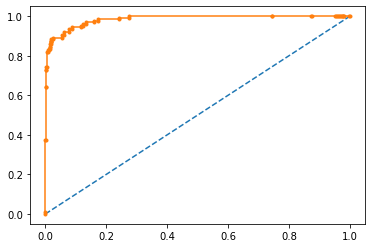

In [161]:


# AUC and ROC for the test data

# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
RFC_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % RFC_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_test, tpr_test, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_test, tpr_test, marker='.')
# show the plot
plt.show()

In [162]:
RFC_metrics=classification_report(y_train,pred_train_rf,output_dict=True)
dfm=pd.DataFrame(RFC_metrics).transpose()
RFC_train_f1=round(dfm.loc["1.0"][2],2)
RFC_train_recall=round(dfm.loc["1.0"][1],2)
RFC_train_precision=round(dfm.loc["1.0"][0],2)
print ('RFC_train_precision ',RFC_train_precision)
print ('RFC_train_recall ',RFC_train_recall)
print ('RFC_train_f1 ',RFC_train_f1)

RFC_train_precision  0.93
RFC_train_recall  0.81
RFC_train_f1  0.86


In [163]:
RFC_metrics=classification_report(y_test,pred_test_rf,output_dict=True)
dfm=pd.DataFrame(RFC_metrics).transpose()
RFC_test_precision=round(dfm.loc["1.0"][0],2)
RFC_test_recall=round(dfm.loc["1.0"][1],2)
RFC_test_f1=round(dfm.loc["1.0"][2],2)
print ('RFC_test_precision ',RFC_test_precision)
print ('RFC_test_recall ',RFC_test_recall)
print ('RFC_test_f1 ',RFC_test_f1)

RFC_test_precision  0.98
RFC_test_recall  0.73
RFC_test_f1  0.83


### Linear Discriminant Analysis

In [164]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [165]:
LDA = LinearDiscriminantAnalysis()

In [166]:
lda_model = LDA.fit(X_train, y_train)

In [167]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [168]:
ytrain_proba_LDA = lda_model.predict_proba(X_train)
ytest_proba_LDA = lda_model.predict_proba(X_test)

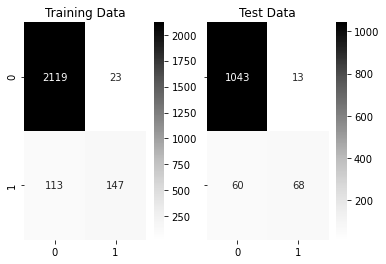

In [169]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC for the Training Data: 0.960
AUC for the Test Data: 0.943


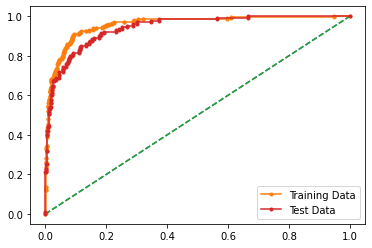

In [170]:
# AUC and ROC for the training data

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(y_train,ytrain_proba_LDA[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_fpr_train, LDA_tpr_train, thresholds = metrics.roc_curve(y_train,ytrain_proba_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_train, LDA_tpr_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(y_test,ytest_proba_LDA[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_fpr_test, LDA_tpr_test, thresholds = metrics.roc_curve(y_test,ytest_proba_LDA[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_fpr_test, LDA_tpr_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [171]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2142
         1.0       0.86      0.57      0.68       260

    accuracy                           0.94      2402
   macro avg       0.91      0.78      0.83      2402
weighted avg       0.94      0.94      0.94      2402



In [172]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1056
         1.0       0.84      0.53      0.65       128

    accuracy                           0.94      1184
   macro avg       0.89      0.76      0.81      1184
weighted avg       0.93      0.94      0.93      1184



In [173]:
LDA_metrics=classification_report(y_train,pred_train_lda,output_dict=True)
dfm=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(dfm.loc["1.0"][2],2)
LDA_train_recall=round(dfm.loc["1.0"][1],2)
LDA_train_precision=round(dfm.loc["1.0"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.86
LDA_train_recall  0.57
LDA_train_f1  0.68


In [174]:
LDA_metrics=classification_report(y_test,pred_test_lda,output_dict=True)
dfm=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(dfm.loc["1.0"][0],2)
LDA_test_recall=round(dfm.loc["1.0"][1],2)
LDA_test_f1=round(dfm.loc["1.0"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.84
LDA_test_recall  0.53
LDA_test_f1  0.65


#### Performance Metrics & Final Model Comparison

In [179]:
index=[ 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[LR_train_auc,LR_train_recall,LR_train_precision,LR_train_f1],
        'LR Test':[LR_test_auc,LR_test_recall,LR_test_precision,LR_test_f1],
       'LDA Train':[LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
        'LR SMOTE Train':[LR_SMOTE_train_auc,LRS_train_recall,LRS_train_precision,LRS_train_f1],
        'LR SMOTE Test':[LR_SMOTE_test_auc,LRS_test_recall,LRS_test_precision,LRS_test_f1],
         'RFC Train':[RFC_train_auc,RFC_train_recall,RFC_train_precision,RFC_train_f1],
        'RFC Test':[RFC_test_auc,RFC_test_recall,RFC_test_precision,RFC_test_f1],
                     },index=index)
round(data,2)                

,LR Train,LR Test,LDA Train,LDA Test,LR SMOTE Train,LR SMOTE Test,RFC Train,RFC Test
AUC,0.97,0.95,0.96,0.94,0.97,0.95,0.99,0.98
Recall,0.69,0.62,0.57,0.53,0.96,0.83,0.81,0.73
Precision,0.88,0.83,0.86,0.84,0.92,0.51,0.93,0.98
F1 Score,0.77,0.71,0.68,0.65,0.94,0.63,0.86,0.83


#### ROC Curve for the Models on the Training data

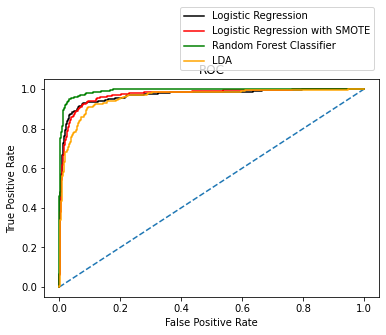

In [180]:

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_fpr_train, LR_tpr_train,color='black',label="Logistic Regression")
plt.plot(LR_SMOTE_fpr_train,LR_SMOTE_tpr_train,color='red',label="Logistic Regression with SMOTE")
plt.plot(fpr_train,tpr_train,color='green',label="Random Forest Classifier")
plt.plot(LDA_fpr_train,LDA_tpr_train,color='orange',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

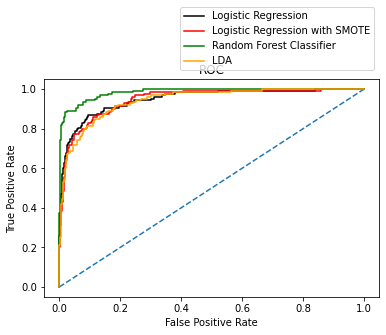

In [181]:
#ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(LR_fpr_test, LR_tpr_test,color='black',label="Logistic Regression")
plt.plot(LR_SMOTE_fpr_test,LR_SMOTE_tpr_test,color='red',label="Logistic Regression with SMOTE")
plt.plot(fpr_test,tpr_test,color='green',label="Random Forest Classifier")
plt.plot(LDA_fpr_test,LDA_tpr_test,color='orange',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
best_grid.summary()